In [43]:
import os

In [44]:
os.getcwd()

'C:\\Users\\User\\Desktop\\stocks_data\\individual_stocks_5yr'

In [45]:
os.chdir('C:\\Users\\User\\Desktop\\stocks_data\\individual_stocks_5yr')

In [46]:
os.getcwd()

'C:\\Users\\User\\Desktop\\stocks_data\\individual_stocks_5yr'

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
##### The tech stocks ill use for this analysis

In [48]:
path = 'C:\\Users\\User\\Desktop\\stocks_data\\individual_stocks_5yr'
company_list=['AMZN_data.csv','GOOG_data.csv','MSFT_data.csv','AAPL_data.csv']

all_data = pd.DataFrame()
for file in company_list:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data,current_df])
    
all_data.shape

(4752, 7)

In [49]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [50]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [51]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [52]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [53]:
tech_list = all_data['Name'].unique()

In [54]:
tech_list

array(['AMZN', 'GOOG', 'MSFT', 'AAPL'], dtype=object)

In [55]:
##### Analyse closing price of all the stocks

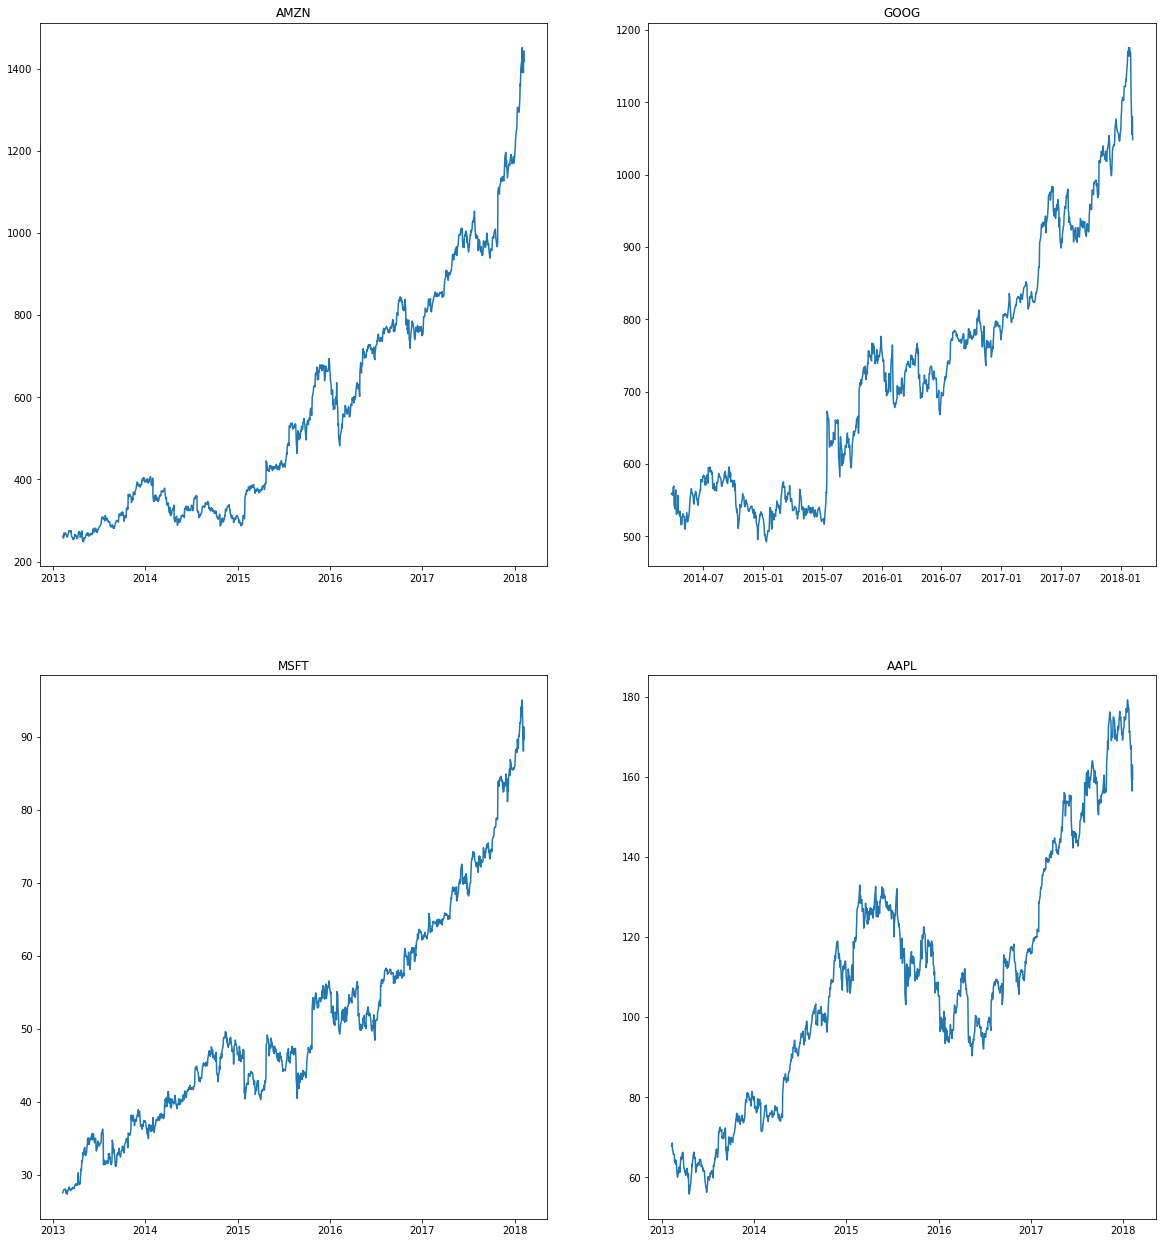

In [56]:
plt.figure(figsize=(20,22))
for i,company in  enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.title(company)

In [57]:
#### the total volume of stock being traded each day

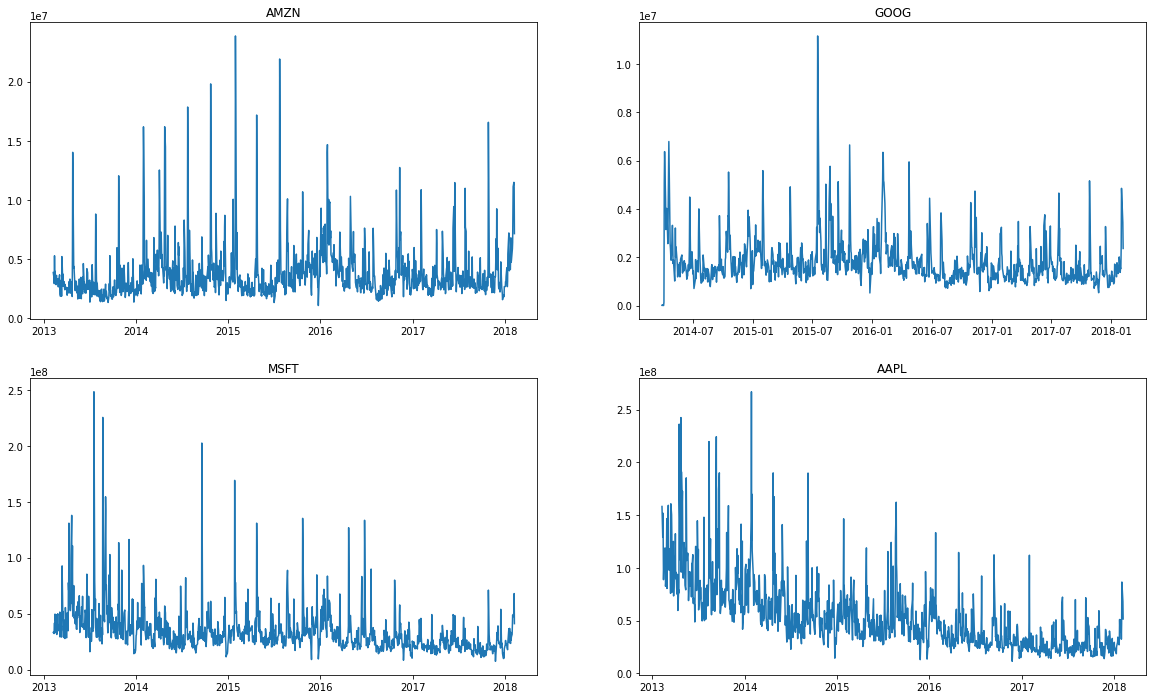

In [58]:
plt.figure(figsize=(20,12))
for i,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['volume'])
    plt.title(company)


In [ ]:
####  using plotly

In [59]:
import plotly.express as px

In [60]:
for company in (tech_list):
    df=all_data[all_data['Name']==company]
    fig = px.line(df, x="date", y="volume", title=company)
    fig.show()

In [ ]:
##### analyse Daily price change in stock

In [61]:
df = pd.read_csv('C://Users//User//Desktop//stocks_data//individual_stocks_5yr/AAPL_data.csv')

In [62]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [63]:
df['daily_price_change']= df['close'] - df['open']

In [64]:
df.head()

,date,open,high,low,close,volume,Name,daily_price_change
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957


In [ ]:
##### percentage return

In [65]:
df['1day % return']=((df['close']-df['open'])/df['close'])*100

In [66]:
df.head()

,date,open,high,low,close,volume,Name,daily_price_change,1day % return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [ ]:
##### using plotly to visualise data

In [67]:
  fig = px.line(df, x="date", y="1day % return", title=company)
fig.show()

In [ ]:
#### Analyse monthly mean of close column

In [68]:
df2=df.copy()

In [69]:
df2.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
daily_price_change    float64
1day % return         float64
dtype: object

In [70]:
df2['date']=pd.to_datetime(df2['date'])

In [71]:
df2.set_index('date',inplace=True)

In [72]:
df2.head()

,open,high,low,close,volume,Name,daily_price_change,1day % return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


<AxesSubplot:xlabel='date'>

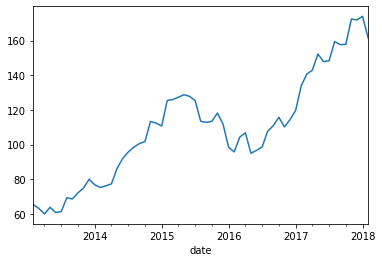

In [73]:
df2['close'].resample('M').mean().plot()

In [ ]:
##### Checking if the Stock prices of these tech companies(Amazon,Apple,Google,Microsoft) are correlated

In [99]:
df2.head()

,open,high,low,close,volume,Name,daily_price_change,1day % return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [ ]:
##### reading data of tech companies

In [74]:
aapl=pd.read_csv('C://Users//User//Desktop//stocks_data//individual_stocks_5yr/AAPL_data.csv')
aapl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [75]:
amzn=pd.read_csv('C://Users//User//Desktop//stocks_data//individual_stocks_5yr/AMZN_data.csv')
amzn.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [76]:
msft=pd.read_csv('C://Users//User//Desktop//stocks_data//individual_stocks_5yr/MSFT_data.csv')
msft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [77]:
goog=pd.read_csv('C://Users//User//Desktop//stocks_data//individual_stocks_5yr/GOOGL_data.csv')
goog.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL
1,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL
2,2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL
3,2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL
4,2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971,GOOGL


In [78]:
### create a blank dataframe
close = pd.DataFrame()

In [79]:
close['aapl']=aapl['close']
close['amzn']=amzn['close']
close['msft']=msft['close']
close['goog']=goog['close']



In [80]:
close.head()

,aapl,amzn,msft,goog
0,67.8542,261.95,27.55,393.0777
1,68.5614,257.21,27.86,391.6012
2,66.8428,258.70,27.88,390.7403
3,66.7156,269.47,28.03,391.8214
4,66.6556,269.24,28.04,394.3039


In [ ]:
#### Multi-variate Analysis

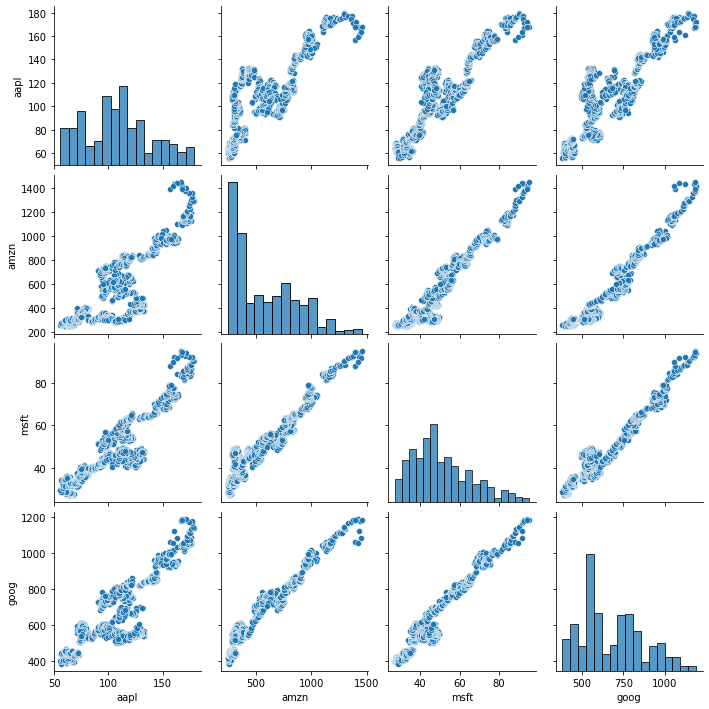

In [81]:
sns.pairplot(data=close)

In [ ]:
##### co-relation plot for stock prices 

<AxesSubplot:>

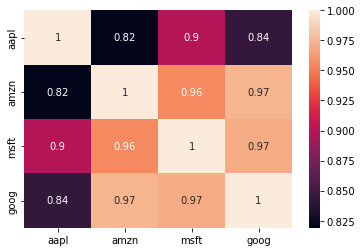

In [82]:
sns.heatmap(close.corr(),annot=True)

In [ ]:
###### Closing price of Google and Microsoft are well correlated

In [83]:
aapl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [ ]:
##### Analyse Daily return of each stock & how they are co-related

In [84]:
data = pd.DataFrame()

In [90]:
data['aapl_change']=((aapl['close']-aapl['open'])/aapl['close'])*100
data['amzn_change']=((amzn['close']-amzn['open'])/amzn['close'])*100
data['msft_change']=((msft['close']-msft['open'])/msft['close'])*100
data['goog_change']=((goog['close']-goog['open'])/goog['close'])*100

In [91]:
data.head()

,aapl_change,amzn_change,msft_change,goog_change
0,0.206325,0.209964,0.725953,0.667196
1,0.714688,-2.328836,0.753769,0.513788
2,-2.481344,-0.189409,0.000000,-0.134514
3,-0.042869,2.946525,0.356761,0.348705
4,0.443624,0.694548,0.427960,1.026873


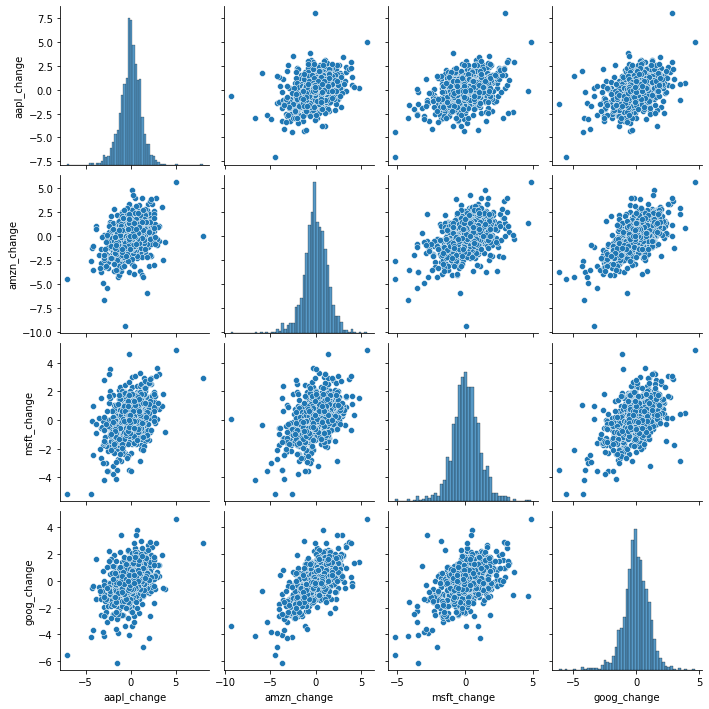

In [92]:
sns.pairplot(data=data)

In [ ]:
##### Correlation plot for daily returns

<AxesSubplot:>

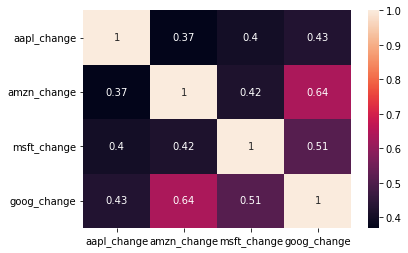

In [93]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
##### We can see that Amazon and microsoft have good correlation on daily returns

In [100]:
data.head()

,aapl_change,amzn_change,msft_change,goog_change
0,0.206325,0.209964,0.725953,0.667196
1,0.714688,-2.328836,0.753769,0.513788
2,-2.481344,-0.189409,0.000000,-0.134514
3,-0.042869,2.946525,0.356761,0.348705
4,0.443624,0.694548,0.427960,1.026873


In [ ]:
#### Value at Risk analysis for Apple

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='aapl_change', ylabel='Density'>

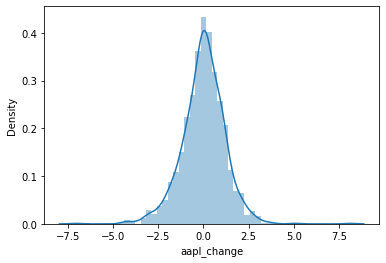

In [94]:
sns.distplot(data['aapl_change'])

In [ ]:
##### it somehow follows a normal distribution

In [95]:
data['aapl_change'].std()

1.1871377131421237

In [98]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
aapl_change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
amzn_change,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
msft_change,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
goog_change,1259.0,-0.028349,1.052191,-6.107290,-0.575799,-0.004508,0.624730,4.652214
